In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('./data/winequality-red.csv', sep=";")

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

In [10]:
df.loc[:, 'quality'] = df.quality.map(quality_mapping)

In [11]:
df = df.sample(frac=1).reset_index(drop=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.3,1.02,0.00,2.0,0.083,17.0,24.0,0.99437,3.59,0.55,11.2,1
1,9.2,0.53,0.24,2.6,0.078,28.0,139.0,0.99788,3.21,0.57,9.5,2
2,8.7,0.31,0.46,1.4,0.059,11.0,25.0,0.99660,3.36,0.76,10.1,3
3,7.7,0.43,0.25,2.6,0.073,29.0,63.0,0.99615,3.37,0.58,10.5,3
4,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,13.5,0.53,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,2
1595,9.6,0.88,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,2
1596,5.6,0.62,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,1
1597,10.7,0.43,0.39,2.2,0.106,8.0,32.0,0.99860,2.89,0.50,9.6,2


In [12]:
df.shape

(1599, 12)

In [13]:
df_train = df.head(1000)

In [14]:
df_test = df.tail(599)

In [20]:
from sklearn import tree
from sklearn import metrics


clf = tree.DecisionTreeClassifier(max_depth=7)
cols = list(df_train.columns[:-1])

clf.fit(df_train[list(df_train.columns[:-1])], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [21]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

train_accuracy, test_accuracy

(0.779, 0.5375626043405676)

In [22]:
df_train.to_csv("./train.csv", index=0)

In [30]:
from sklearn import model_selection
df = pd.read_csv('train.csv')
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop = True)
# kf = model_selection.Kfold(n_splits=5)
kf = model_selection.StratifiedKFold(n_splits=5)
y = df.quality.values
# for fold, (trn_, val_) in enumerate(kf.split(X=df)):
for fold, (trn_, val_) in enumerate(kf.split(X=df, y=y)):
    df.loc[val_, 'kfold'] = fold

In [31]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.6,0.645,0.25,2.0,0.083,8.0,28.0,0.99815,3.28,0.60,10.0,3,0
1,6.9,0.510,0.23,2.0,0.072,13.0,22.0,0.99438,3.40,0.84,11.2,3,0
2,8.1,0.870,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,9.8,1,0
3,8.1,0.330,0.44,1.5,0.042,6.0,12.0,0.99542,3.35,0.61,10.7,2,0
4,12.7,0.600,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.4,2,0


In [32]:
df.kfold.unique()

array([0, 1, 2, 3, 4])

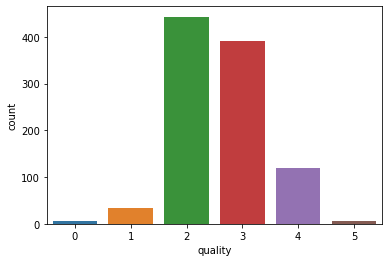

In [33]:
import seaborn as sns
b = sns.countplot(x='quality', data=df)


In [34]:
import numpy as np

In [36]:
np.floor(3.5)

3.0

In [40]:
np.round(3.2)

3.0

In [39]:
np.ceil(3.2)

4.0

In [41]:
from sklearn import datasets